 ### Part (2)
 ## Data cleaning process from data scraping 

 ### Objective

 #### In this stage is analized the information from the scrapping proccess. 
 #### This step was carried out to obtain an adequate data collection for the analysis. The following tasks were performed:

 #### -Clean and manage the information in the data frame.
 #### -Perform descriptive analysis of collected data (RDA).
 #### -Build visualizations of the collected data.
 

 # 1. Import the libraries and CSV with data collected for scrapping.

 ### 1.1 Import the libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression as LinReg
# from sklearn.preprocessing import RobustScaler
# import sklearn
#from scipy import stats
#import sklearn.model_selection
%matplotlib inline

 ### 1.2 Import the CSV from data scrapping

In [2]:
df=pd.read_csv('C:/Users/far/OneDrive/Escritorio/coffee_.csv')   # import csv file


 ### Exploring the estructure data

 #### The review started with the information generated by data scraping. It is observed that most of the categories have non-null data. The name columns 'with milk' and 'acidity' have no amount of data, these columns will be dropped from the data frame.

In [3]:
###get information from the data scrapping###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Roaster Location   1919 non-null   object 
 1   Coffee Origin      1920 non-null   object 
 2   Roast Level        1860 non-null   object 
 3   Agtron             1920 non-null   object 
 4   Est. Price         1912 non-null   object 
 5   Review Date        1920 non-null   object 
 6   Aroma              1891 non-null   float64
 7   Acidity/Structure  1380 non-null   float64
 8   Body               1917 non-null   float64
 9   Flavor             1917 non-null   float64
 10  Aftertaste         1917 non-null   float64
 11  Name               1917 non-null   object 
 12  Roaster            1917 non-null   object 
 13  Rating             1917 non-null   float64
 14  With Milk          323 non-null    float64
 15  Acidity            239 non-null    float64
dtypes: float64(8), object(8)

#### Looking at the data frame values we can see that some columns have different values, for example, 'est.price' shows different values, so the price should be standardized to a single unit and currency.

In [4]:
### Looks data frame structure####
df.head(5)

,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating,With Milk,Acidity
0,"Henderson, Nevada","Volcan, Panama",Light,64/84,$49.95/8 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Mojave Vault Series Geisha Natural,Dragonfly Coffee Roasters,94.0,NaN,NaN
1,"Durango, Colorado","Vereda, Huila Province, Colombia",Medium-Light,56/74,$19.95/12 ounces,July 2021,8.0,8.0,8.0,9.0,8.0,Colombia Black Condor,Durango Coffee Company,91.0,NaN,NaN
2,"Hong Kong, China",Brazil; Papua New Guinea; Indonesia,Medium-Light,56/76,HKD $118/200 grams,July 2021,9.0,8.0,9.0,9.0,8.0,Choco Blend,NINETYs Roastery,93.0,NaN,NaN
3,"Madison, Wisconsin","Kabiufa, Eastern Highlands, Papua New Guinea",Light,60/82,$16.00/12 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Kabiufa Papua New Guinea,JBC Coffee Roasters,94.0,NaN,NaN
4,"New Taipei City, Taiwan","Guji Zone, Oromia Region, Hambela Woreda, Ethi...",Medium-Light,60/78,NT $350/227 grams,July 2021,9.0,9.0,9.0,9.0,8.0,Ethiopia Buku Abela,Home in Harmony,94.0,NaN,NaN


In [5]:
df.drop(['With Milk', 'Acidity'], axis=1, inplace=True)
df = df[df['Est. Price'].notna()]
df = df[df['Roast Level'].notna()]
df.fillna('0')

,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating
0,"Henderson, Nevada","Volcan, Panama",Light,64/84,$49.95/8 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Mojave Vault Series Geisha Natural,Dragonfly Coffee Roasters,94.0
1,"Durango, Colorado","Vereda, Huila Province, Colombia",Medium-Light,56/74,$19.95/12 ounces,July 2021,8.0,8.0,8.0,9.0,8.0,Colombia Black Condor,Durango Coffee Company,91.0
2,"Hong Kong, China",Brazil; Papua New Guinea; Indonesia,Medium-Light,56/76,HKD $118/200 grams,July 2021,9.0,8.0,9.0,9.0,8.0,Choco Blend,NINETYs Roastery,93.0
3,"Madison, Wisconsin","Kabiufa, Eastern Highlands, Papua New Guinea",Light,60/82,$16.00/12 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Kabiufa Papua New Guinea,JBC Coffee Roasters,94.0
4,"New Taipei City, Taiwan","Guji Zone, Oromia Region, Hambela Woreda, Ethi...",Medium-Light,60/78,NT $350/227 grams,July 2021,9.0,9.0,9.0,9.0,8.0,Ethiopia Buku Abela,Home in Harmony,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,"Oakville, Ontario, Canada","Central Valley, Costa Rica",Medium-Light,54/76,CAD $17.00/12 ounces,August 2016,8.0,0,9.0,8.0,8.0,Sol Naciente Costa Rica Red Honey,Reunion Island Coffee,91.0
1916,"Boulder, Colorado","Nyeri growing region, south-central Kenya",Medium-Light,56/76,$24.00/12 ounces,August 2016,9.0,0,9.0,9.0,8.0,Kenya Nyeri Chinga Peaberry,Dragonfly Coffee Roasters,93.0
1917,"Floyd, Virginia","Hambela Wamena District, Guji Zone, Oromia Reg...",Light,65/78,$16.00/12 ounces,August 2016,9.0,0,8.0,9.0,9.0,Ethiopia Hambela Washed,Red Rooster Coffee Roaster,94.0
1918,"Floyd, Virginia","Nyeri growing region, south-central Kenya",Medium-Light,54/74,$19.00/12 ounces,August 2016,9.0,0,9.0,9.0,8.0,Milepost Kenya Nyeri Kiamabara,Red Rooster Coffee Roaster,93.0


In [6]:
df.isna().sum()

Roaster Location       1
Coffee Origin          0
Roast Level            0
Agtron                 0
Est. Price             0
Review Date            0
Aroma                  3
Acidity/Structure    518
Body                   3
Flavor                 3
Aftertaste             3
Name                   3
Roaster                3
Rating                 3
dtype: int64

In [7]:
df.fillna('0')

,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,Name,Roaster,Rating
0,"Henderson, Nevada","Volcan, Panama",Light,64/84,$49.95/8 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Mojave Vault Series Geisha Natural,Dragonfly Coffee Roasters,94.0
1,"Durango, Colorado","Vereda, Huila Province, Colombia",Medium-Light,56/74,$19.95/12 ounces,July 2021,8.0,8.0,8.0,9.0,8.0,Colombia Black Condor,Durango Coffee Company,91.0
2,"Hong Kong, China",Brazil; Papua New Guinea; Indonesia,Medium-Light,56/76,HKD $118/200 grams,July 2021,9.0,8.0,9.0,9.0,8.0,Choco Blend,NINETYs Roastery,93.0
3,"Madison, Wisconsin","Kabiufa, Eastern Highlands, Papua New Guinea",Light,60/82,$16.00/12 ounces,July 2021,9.0,9.0,9.0,9.0,8.0,Kabiufa Papua New Guinea,JBC Coffee Roasters,94.0
4,"New Taipei City, Taiwan","Guji Zone, Oromia Region, Hambela Woreda, Ethi...",Medium-Light,60/78,NT $350/227 grams,July 2021,9.0,9.0,9.0,9.0,8.0,Ethiopia Buku Abela,Home in Harmony,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,"Oakville, Ontario, Canada","Central Valley, Costa Rica",Medium-Light,54/76,CAD $17.00/12 ounces,August 2016,8.0,0,9.0,8.0,8.0,Sol Naciente Costa Rica Red Honey,Reunion Island Coffee,91.0
1916,"Boulder, Colorado","Nyeri growing region, south-central Kenya",Medium-Light,56/76,$24.00/12 ounces,August 2016,9.0,0,9.0,9.0,8.0,Kenya Nyeri Chinga Peaberry,Dragonfly Coffee Roasters,93.0
1917,"Floyd, Virginia","Hambela Wamena District, Guji Zone, Oromia Reg...",Light,65/78,$16.00/12 ounces,August 2016,9.0,0,8.0,9.0,9.0,Ethiopia Hambela Washed,Red Rooster Coffee Roaster,94.0
1918,"Floyd, Virginia","Nyeri growing region, south-central Kenya",Medium-Light,54/74,$19.00/12 ounces,August 2016,9.0,0,9.0,9.0,8.0,Milepost Kenya Nyeri Kiamabara,Red Rooster Coffee Roaster,93.0




 #### For get a better analisis of the coffee in this step the data is standarized especially for the prices of coffee.
 #### The principal task now is to change the untis of measure of the prices of coffee.
 #### To do so, the data transformation was performed using the split, replace, and regex function to separate the information in the price column.

#### standardizing the price column

In [8]:
####show unique values for coffee price###
df['Est. Price'].unique()

array(['$49.95/8 ounces', '$19.95/12 ounces', 'HKD $118/200 grams',
       '$16.00/12 ounces', 'NT $350/227 grams', '$18.00/12 ounces',
       '$35.00/8 ounces', 'NT $600/200 grams', '$27.00/12 ounces',
       '¥2980/100 grams', 'NT $800/8 ounces', 'NT $600/8 ounces',
       'NT $380/12 ounces', '$48.00/12 ounces', '$16.00/8 ounces',
       '$87.00/12 ounces', '$28.00/12 ounces', '$25.00/12 ounces',
       'NT $500/150 grams', 'NT $650/150 grams', 'NT $1450/150 grams',
       'NT $350/250 grams', '$25.00/4 ounces', '$45.00/12 ounces',
       '$28.99/12 ounces', '$20.50/12 ounces', '$21.00/12 ounces',
       '$17.90/12 ounces', '$20.00/12 ounces', '$16.95/12 ounces',
       '$15.95/12 ounces', '$29.95/4 ounces', '$15.99/12 ounces',
       '$24.00/12 ounces', 'NT $350/16 ounces', '$17.00/12 ounces',
       '$21.50/12 ounces', '$17.99/16 ounces', '$17.50/12 ounces',
       '$22.50/12 ounces', '¥1,050/100 grams', 'NT $220/8 ounces',
       '$15.99/10 ounces', '$24.95/12 ounces', 'NT $290/8

In [9]:
###create new columns to have price and quantity separated###
price= df['Est. Price'].str.split('[/]', expand=True)
price.columns = ['price', 'quantity']
df = pd.concat([df, price], axis=1)
df.drop(['Est. Price'], axis=1, inplace=True)

In [10]:
###create new columns to have quantity and units of measure separated
quantity= df['quantity'].str.split('[ ]', expand=True)
quantity.columns = ['quantity2', 'unit', 'unit2']
df = pd.concat([df, quantity], axis=1)
df.drop(['quantity', 'unit2'], axis=1, inplace=True)

In [11]:
### seeking unit prices to standardize###
df['price'].unique()

array(['$49.95', '$19.95', 'HKD $118', '$16.00', 'NT $350', '$18.00',
       '$35.00', 'NT $600', '$27.00', '¥2980', 'NT $800', 'NT $380',
       '$48.00', '$87.00', '$28.00', '$25.00', 'NT $500', 'NT $650',
       'NT $1450', '$45.00', '$28.99', '$20.50', '$21.00', '$17.90',
       '$20.00', '$16.95', '$15.95', '$29.95', '$15.99', '$24.00',
       '$17.00', '$21.50', '$17.99', '$17.50', '$22.50', '¥1,050',
       'NT $220', '$24.95', 'NT $290', '$20.49', 'NT $700', 'NT $325',
       'NT $300', 'NT $550', 'NT $450', '$30.00', '$17.95', '$14.00',
       '$22.00', '$24.99', '$15.80', '$24.75', '$19.50', 'NT $420',
       'NT $900', 'NT $320', 'NT $560', '$32.99', 'NT $2200', '$14.74',
       '500 pesos', 'NT $400', 'NT $330', 'NT $250', '$60.00', '$10.00',
       '¥1280', 'NT $210', 'NT $375', 'NT $360', 'NT $390', '$29.00',
       '$19.00', '$12.99', '$16.20', '$18.50', '$23.00', '$87.50',
       '$120.00', '$33.00', '$50.00', '$47.00', '$12.50', 'CAD $18.00',
       'CAD $21.00', '$19.

In [12]:
###showing diferent measures in unit column 
df['unit'].unique()

array(['ounces', 'grams', 'tin', '7', 'kilo', 'pounds', 'gram',
       'capsules', 'kilogram'], dtype=object)

In [13]:
# Create currency column for extract diferent values from price column###
df['currency'] = df['price'].str.extract(('([a-zA-Z]\w{0,})'),expand = True)
df['currency'].unique()

array([nan, 'HKD', 'NT', 'pesos', 'CAD', 'USD', 'US', 'HK', 'LAK', 'IDR',
       'AUD', 'AED', 'NTD', 'Euros', 'KRW', 'THB', 'RMB'], dtype=object)

In [14]:
###Create new price_ column for extract simbols of currency
df['price_'] = df['price'].str.extract(('([\D])'),expand = True)
df['price_'].unique()

array(['$', 'H', 'N', '¥', ' ', 'C', 'U', '€', 'I', 'A', '.', '£', 'K',
       'T', 'R'], dtype=object)

In [15]:
## create new column for extract price numbers from price column
df['price2'] = df['price'].str.extract(('(\d+(?:\.\d+)?)'), expand = True)

 ### Currency exchange rate to standardize coffee prices

 #### Now that the pricing information has been separated, the next step is to standardize the pricing to a single currency in this case, the Euro.

In [16]:
### Transform diferents currencies to eur value
df['price_'] = df['price_'].replace(['N'],'0.030')
df['price_'] = df['price_'].replace(['$'],'0.85')
df['price_'] = df['price_'].replace(['H'],'0.11')
df['price_'] = df['price_'].replace(['U'],'0.85')
df['price_'] = df['price_'].replace(['I'],'0.000058')
df['price_'] = df['price_'].replace(['A'],'0.62')
df['price_'] = df['price_'].replace(['K'],'0.00073')
df['price_'] = df['price_'].replace(['R'],'0.13')
df['price_'] = df['price_'].replace(['C'],'0.11')
df['price_'] = df['price_'].replace(['T'],'0.030')
df['price_'] = df['price_'].replace(['¥'],'0.0077')
df['price_'] = df['price_'].replace(['£'],'1.17')
df['price_'] = df['price_'].replace([' '],'0.85')
df['price_'] = df['price_'].replace(['.'],'0.85')
df['price_'] = df['price_'].replace(['€'],'0.85')
df['price_'] = df['price_'].replace(['nan'],'0.85')

df['price_'].unique()

array(['0.85', '0.11', '0.030', '0.0077', '0.000058', '0.62', '1.17',
       '0.00073', '0.13'], dtype=object)

In [17]:
### Change value type of price from object to float
df['price2'] = df['price2'].astype(float)
df['price_'] = df['price_'].astype(float)

In [18]:
### Create the eur column name for get the standarized price
df['euro'] = df.price_ * df.price2

### Standardizing the measurement unit
#### the next step is to standardize the different units of measurement and transform them to just one measurement in this case grams

In [19]:
### Different measures units presents in the df
df['unit'].unique()

array(['ounces', 'grams', 'tin', '7', 'kilo', 'pounds', 'gram',
       'capsules', 'kilogram'], dtype=object)

In [20]:
### Standardizing different measures to grams
df['unit'] = df['unit'].replace(['ounces'],'28.70')
df['unit'] = df['unit'].replace(['grams'],'1.00')
df['unit'] = df['unit'].replace(['bottle'],'220.0')
df['unit'] = df['unit'].replace(['bottles'],'220.0')
df['unit'] = df['unit'].replace(['ml'],'1.00')
df['unit'] = df['unit'].replace(['can'],'220.00')
df['unit'] = df['unit'].replace(['bottle'],'220.0')
df['unit'] = df['unit'].replace(['7'],'7.0')
df['unit'] = df['unit'].replace(['12-ounce'],'12.0')
df['unit'] = df['unit'].replace(['16'],'16.0')
df['unit'] = df['unit'].replace(['tin'],'250.0')
df['unit'] = df['unit'].replace(['6-ounce;'],'28.70')
df['unit'] = df['unit'].replace(['8-ounce'],'28.70')
df['unit'] = df['unit'].replace(['9.5-ounce'],'28.70')
df['unit'] = df['unit'].replace(['ounces.'],'28.70')
df['unit'] = df['unit'].replace(['onces'],'28.70')
df['unit'] = df['unit'].replace(['gram'],'1.00')
df['unit'] = df['unit'].replace(['kilogram'],'1')
df['unit'] = df['unit'].replace(['oz.'],'28.70')
df['unit'] = df['unit'].replace(['g'],'1.00')
df['unit'] = df['unit'].replace(['fluid'],'220')
df['unit'] = df['unit'].replace(['5'],'5.0')
df['unit'] = df['unit'].replace(['250'],'250.0')
df['unit'] = df['unit'].replace(['capsules'],'210.0')
df['unit'] = df['unit'].replace(['12-ounces'],'220.0')
df['unit'] = df['unit'].replace(['kilo'],'220.0')
df['unit'] = df['unit'].replace(['sticks'],'3.0')
df['unit'] = df['unit'].replace(['None'],'220.0')
df['unit'] = df['unit'].replace(['5'],'5.0')
df['unit'] = df['unit'].replace(['ounce'],'28.70')
df['unit'] = df['unit'].replace(['6-ounce'],'180.0')
df['unit'] = df['unit'].replace(['ml.'],'1')
df['unit'] = df['unit'].replace(['pounds'],'453.0')

In [21]:
###Differents measures sales format from roasters companies
df['quantity2'].unique()

array(['8', '12', '200', '227', '100', '150', '250', '4', '16', '10',
       '300', '225', '150-gram', '7', '11', '220', '6', '230', '12.64',
       '500', '50', '455', '454', '460', '115', '20', '30', '14', '450',
       '2', '222', '340', '', '1', '22', '32', '18', '21', '400', '3',
       '120', '113.5', '3.4'], dtype=object)

In [22]:
### Standardizing different measures sales format to grams
df['quantity2'] = df['quantity2'].replace(['160-ml'],'160')
df['quantity2'] = df['quantity2'].replace(['200-ml'],'160')
df['quantity2'] = df['quantity2'].replace(['12-ounce'],'12')
df['quantity2'] = df['quantity2'].replace(['150-gram'],'150')
df['quantity2'] = df['quantity2'].replace(['8-ounce'],'160')
df['quantity2'] = df['quantity2'].replace(['can'],'1')
df['quantity2'] = df['quantity2'].replace(['8.4-ounce'],'8.4')
df['quantity2'] = df['quantity2'].replace(['25.4-ounce'],'25.4')
df['quantity2'] = df['quantity2'].replace(['six'],'6')
df['quantity2'] = df['quantity2'].replace(['four'],'4')
df['quantity2'] = df['quantity2'].replace(['twelve'],'12')
df['quantity2'] = df['quantity2'].replace(['can'],'100')
df['quantity2'] = df['quantity2'].replace(['82ounce'],'82')
df['quantity2'] = df['quantity2'].replace(['10.5-ounce'],'10.5')
df['quantity2'] = df['quantity2'].replace(['sachet'],'34')
df['quantity2'] = df['quantity2'].replace(['150-gram'],'150')
df['quantity2'] = df['quantity2'].replace(['8.4-ounce'],'12')
df['quantity2'] = df['quantity2'].replace(['25.4-ounce'],'12')
df['quantity2'] = df['quantity2'].replace(['11-ounce'],'12')
df['quantity2'] = df['quantity2'].replace(['10-ounce'],'12')
df['quantity2'] = df['quantity2'].replace([''],'12')
df['quantity2'] = df['quantity2'].replace(['150-gram'],'150')

In [23]:
### Change value types of price from object to float
df['quantity2'] = df['quantity2'].astype(float)
df['unit'] = df['unit'].astype(float)
### Converting the standard quantity to unit/g
df['unit_g'] = df.quantity2 * df.unit

In [24]:
### Converting the unit/g to eur/gr
df['euro/gr'] = df.euro / df.unit_g
### changing data type from object to float
df['euro/gr'] = df['euro/gr'].astype(float)
### checking is the value is correct
df['euro/gr'].apply(np.isinf)

0       False
1       False
2       False
3       False
4       False
        ...  
1915    False
1916    False
1917    False
1918    False
1919    False
Name: euro/gr, Length: 1854, dtype: bool

In [25]:
###Separating agtron measure in unit and scale

agtron= df['Agtron'].str.split('[/]', expand=True)
agtron.columns = ['agtron', 'Agtron scale']
df = pd.concat([df, agtron], axis=1)
df.drop(['Agtron'], axis=1, inplace=True)
df['agtron'].unique()

df['agtron '] = df['agtron'].replace([''],'0')
# ###### changing data type from object to float
df['agtron '] = df['agtron '].astype(float)
df['Agtron scale'] = df['Agtron scale'].astype(float)


In [26]:
### Drop columns from df
df.drop(['unit', 'unit_g', 'currency', 'price_', 'price2', 'quantity2', 'price'], axis=1, inplace=True)

In [27]:
### Reorder the df columns
df = df.reindex(columns = ['Rating', 'Roaster', 'Roaster Location','Roast Level', 'Name', 'Coffee Origin', 'Aroma', 'Body', 'Flavor',
                           'Acidity/Structure', 'Aftertaste', 'agtron ', 'Agtron scale', 'euro', 'euro/gr', 'Review Date'])


In [28]:
df=df.rename(columns={'Roast Level': 'Roast', 'agtron ': 'Agtron'})

In [29]:
df = df.drop_duplicates(subset=['Name'], keep='last')


 ### Obtaining geographic coordinates of different coffee roasters

 #### In this step, the geographical coordinates of the roasters are obtained in order to create a dashboard containing this information. For this, we use geopy and generate a list with the data. 

In [30]:
import geopy.geocoders
from geopy.geocoders import Nominatim
import time
from time import sleep

geolocator = Nominatim(user_agent="wieder")

df_loc= pd.DataFrame(columns=['location'])
location_list=[]

for local in df['Roaster Location']:
  try:
    sleep(1)
    loc = geolocator.geocode(local).raw
    location_list.append(loc)
  except Exception as e:
    print(e)
    

'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=I-Lan+City%2C+Taiwan&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
'NoneType' object has no attribute 'raw'
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=I-Lan+City%2C+Taiwan&format=json&limi

In [31]:
### reation of a new df from the generated list
df_loc = pd.DataFrame(location_list) 


 ### Dealing with NaN

In [32]:
###dropping the unused columns from the new dataframe
df_loc= df_loc.drop(columns=['licence', 'osm_type', 'boundingbox','place_id', 'osm_id', 'class', 'type', 'importance', 'icon'])
###merging of coffee and coordinates data frames to become one
df=df.join(df_loc, how='outer')
###obtaining only the data that are not null in the rating and display name columns
df = df[df['Rating'].notna()]
df = df[df['display_name'].notna()]
df=df.dropna(subset=['Rating'])

 # Check Normality visually

 ### RDA STAGE


In [33]:
df.describe()

,Rating,Aroma,Body,Flavor,Acidity/Structure,Aftertaste,Agtron,Agtron scale,euro,euro/gr
count,1482.000000,1482.000000,1482.000000,1482.000000,1216.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,92.938596,8.805668,8.581646,8.939946,8.483553,8.081646,58.529015,74.304318,19.241494,0.093338
std,1.707000,0.453088,0.516193,0.383360,0.560475,0.496525,135.727592,7.411861,23.533087,0.470286
min,83.000000,7.000000,6.000000,7.000000,6.000000,6.000000,0.000000,37.000000,0.006960,0.000028
25%,92.000000,9.000000,8.000000,9.000000,8.000000,8.000000,52.000000,71.000000,12.750000,0.039464
50%,93.000000,9.000000,9.000000,9.000000,9.000000,8.000000,55.000000,76.000000,15.300000,0.046893
75%,94.000000,9.000000,9.000000,9.000000,9.000000,8.000000,58.000000,78.000000,18.700000,0.069892
max,98.000000,10.000000,10.000000,10.000000,10.000000,9.000000,5252.000000,105.000000,595.000000,16.500000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 0 to 1682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             1482 non-null   float64
 1   Roaster            1482 non-null   object 
 2   Roaster Location   1481 non-null   object 
 3   Roast              1482 non-null   object 
 4   Name               1482 non-null   object 
 5   Coffee Origin      1482 non-null   object 
 6   Aroma              1482 non-null   float64
 7   Body               1482 non-null   float64
 8   Flavor             1482 non-null   float64
 9   Acidity/Structure  1216 non-null   float64
 10  Aftertaste         1482 non-null   float64
 11  Agtron             1482 non-null   float64
 12  Agtron scale       1482 non-null   float64
 13  euro               1482 non-null   float64
 14  euro/gr            1482 non-null   float64
 15  Review Date        1482 non-null   object 
 16  lat                1482 

In [35]:
df.isna()

,Rating,Roaster,Roaster Location,Roast,Name,Coffee Origin,Aroma,Body,Flavor,Acidity/Structure,Aftertaste,Agtron,Agtron scale,euro,euro/gr,Review Date,lat,lon,display_name
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1679,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1680,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1681,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [36]:
#transforming the dataframe to csv
import os  
os.makedirs('C:/Users/far/OneDrive/Escritorio', exist_ok=True)  
df.to_csv('coffee_2.csv')  

 # Visualization of clean data

 #### Once is finish the the cleaning and wrangling procces the data is checked for descriptive analisis.


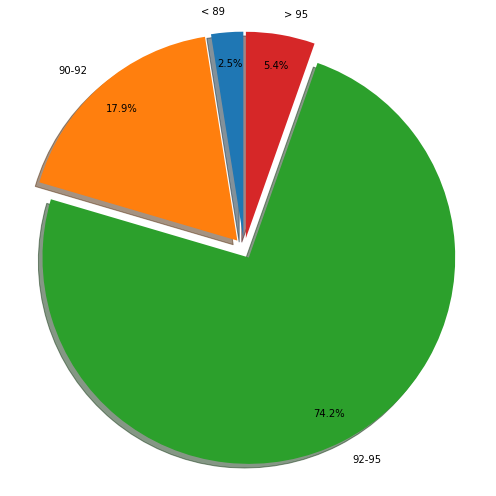

In [37]:
# Coffee Category 

range_1 = df[df['Rating'] < 89]
range_2 = df[(df['Rating'] >= 89.1 ) & (df.Rating < 92)]
range_3 = df[(df['Rating'] >= 92.1 ) & (df.Rating < 95)]
range_4 = df[df['Rating'] >= 95.1 ]

label_names=['< 89','90-92','92-95','> 95']
sizes = [range_1.shape[0],range_2.shape[0],range_3.shape[0],range_4.shape[0]]
# the donut plot
explode = (0.05,0.05,0.05,0.05)
my_circle=plt.Circle((0,0),0.0,color='white')
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%',pctdistance=0.85,startangle=90,shadow=True)
fig=plt.gcf()
fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### The figure shows that 72% of the coffee brands are grouped in the category of 92-95 rating points. Then 17% are located in the 90-92 category. Finally, 2.5% corresponds to <89 points and 5.4% to >95 rating points.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


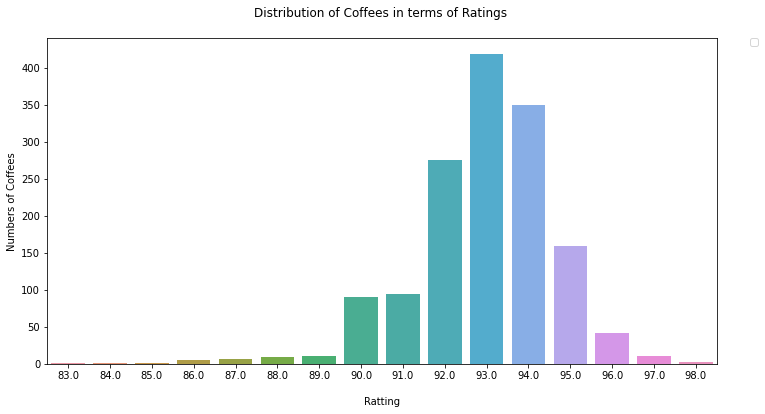

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Rating')
plt.xlabel("\nRatting")
plt.ylabel("Numbers of Coffees")
plt.title("Distribution of Coffees in terms of Ratings \n")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### The figure shows that most of the coffee brands are evaluated between 92 and 95 rating points. The number of coffee brands between the three classifications exceeds approximately one thousand.

In [39]:
d2 = df.groupby('Roaster').aggregate({'Rating':'mean'})
d2 = d2.sort_values('Rating', ascending=False).head(10)
d2 = d2.reset_index()
d2

,Roaster,Rating
0,Bar Nine,96.0
1,Kakalove Café,96.0
2,Campos Coffee,95.5
3,Rusty’s Hawaiian,95.0
4,Boon Boona Coffee,95.0
5,RD Cafe,95.0
6,Greybox Coffee,95.0
7,Good Folks Coffee,95.0
8,Small Eyes Café,95.0
9,Ho Soo Tsai,95.0


#### The table shows the roasting companies with the best rating on average according to the brands of coffee they distribute. Bar nine, Kakalove Cafe and Campos Coffee obtain the best scores.

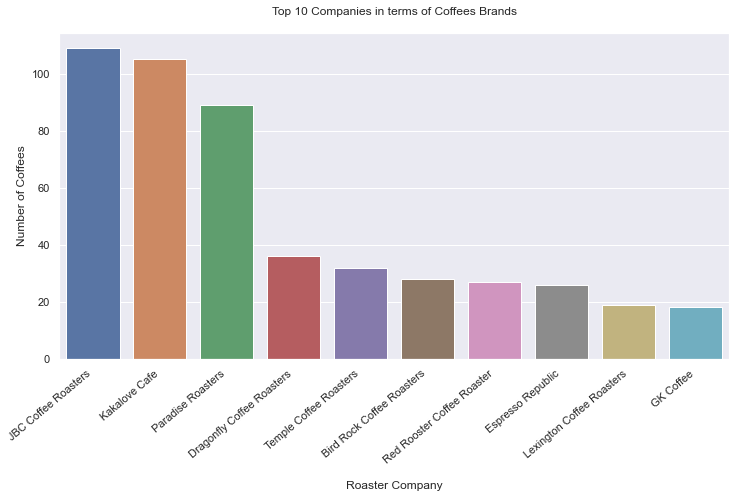

In [40]:
### Top companies in terms of coffee in this dataset
d = df['Roaster'].value_counts().sort_values(ascending=False).head(10)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top companies

# Plotting
sns.set()
plt.figure(figsize=(12,6))
sns.barplot(x='index', y='Roaster', data=d)
plt.xlabel("\nRoaster Company")
plt.ylabel("Number of Coffees")
plt.xticks(rotation=40, ha="right")
plt.title("Top 10 Companies in terms of Coffees Brands\n")
plt.show()

#### The following graph shows the largest amount of coffee brands distributed by roasting company. Among the largest roasters are JBC, Kakalove coffee and Paradise Roasters, with over 80 brands. 

#### The following graphs show the characteristic evaluations of coffee with respect to the rating. It is observed that as the score increases the number of coffee brands decreases. This is observed in the level of aroma, flavor and acidity. On the other hand, in the aftertaste level, a smaller number of coffees are found in the lowest score values.

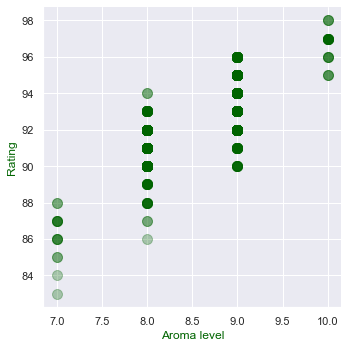

In [41]:
# Coffee caracteristics and Rating

sns.lmplot(x='Aroma', y='Rating',fit_reg=False,scatter_kws={"color":"darkgreen","alpha":0.3,"s":100},data=df)
plt.xlabel('Aroma level',size=12,color='darkgreen')
plt.ylabel('Rating',size=12,color='darkgreen')
plt.show()

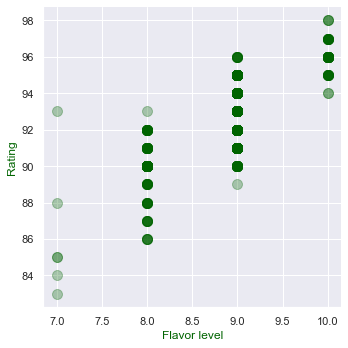

In [42]:
# Coffee flavor and Rating

sns.lmplot(x='Flavor', y='Rating',fit_reg=False,scatter_kws={"color":"darkgreen","alpha":0.3,"s":100},data=df)
plt.xlabel('Flavor level',size=12,color='darkgreen')
plt.ylabel('Rating',size=12,color='darkgreen')
plt.show()

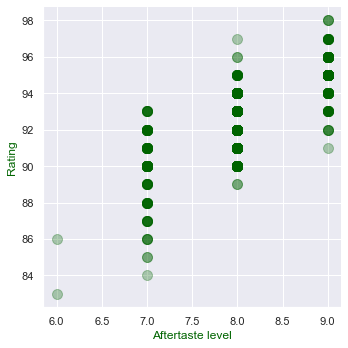

In [43]:
# Coffee Aftertaste and Rating

sns.lmplot(x='Aftertaste', y='Rating',fit_reg=False,scatter_kws={"color":"darkgreen","alpha":0.3,"s":100},data=df)
plt.xlabel('Aftertaste level',size=12,color='darkgreen')
plt.ylabel('Rating',size=12,color='darkgreen')
plt.show()

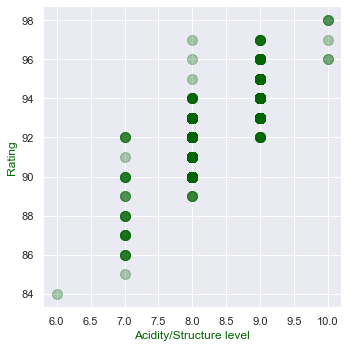

In [44]:
# Coffee Acidity/Structure and Rating

sns.lmplot(x='Acidity/Structure', y='Rating',fit_reg=False,scatter_kws={"color":"darkgreen","alpha":0.3,"s":100},data=df)
plt.xlabel('Acidity/Structure level',size=12,color='darkgreen')
plt.ylabel('Rating',size=12,color='darkgreen')
plt.show()

Top Location Producing Coffees in the World

Chia-Yi, Taiwan           111
Madison, Wisconsin        109
Minneapolis, Minnesota     67
Taipei, Taiwan             60
Sacramento, California     55
Name: Roaster Location, dtype: int64


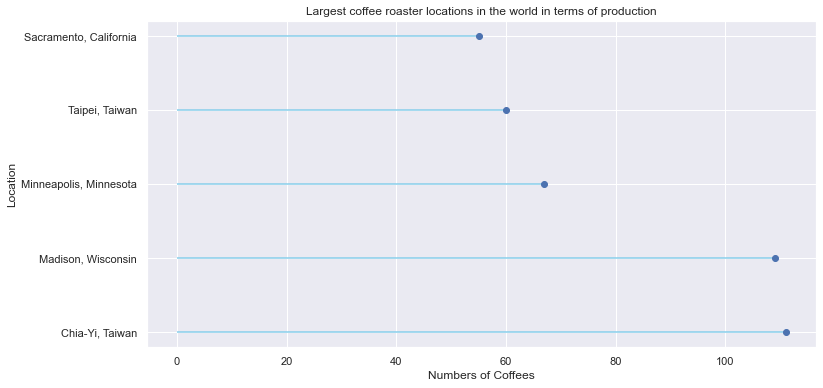

In [45]:
# Location

print ('Top Location Producing Coffees in the World\n')
country=list(df['Roaster Location'].value_counts().head(5).index)
coffee=list(df['Roaster Location'].value_counts().head(5))
prod_ctry=dict(zip(country,coffee))
print(df['Roaster Location'].value_counts().head())

plt.figure(figsize=(12,6))
plt.hlines(y=country,xmin=0,xmax=coffee,color='skyblue')
plt.plot(coffee,country,"o")
plt.xlabel('Numbers of Coffees')
plt.ylabel('Location')
plt.title("Largest coffee roaster locations in the world in terms of production")
plt.show()

#### The figure shows that the largest locations with roasting companies are in Taiwan, China (111), Madison, Wisconsin (109) and Minneapolis, Minnesota (67).

Text(0.5, 1.0, 'Top 10 Coffees in terms of price')

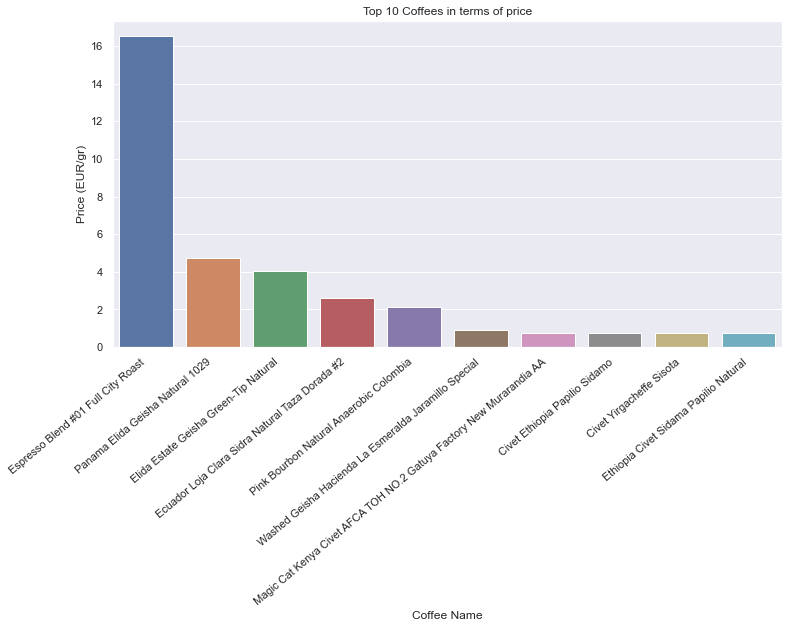

In [46]:
# Top 10 Coffees in terms of price
df3 = df.sort_values('euro/gr', ascending=False).head(10)
df3 = df3.reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=df3,x='Name',y='euro/gr')
plt.xticks(rotation=40, ha="right")
plt.xlabel("Coffee Name")
plt.ylabel("Price (EUR/gr)")
plt.title("Top 10 Coffees in terms of price")

#### The following graph shows that the coffee with the highest price corresponds to an espresso blend with a value of 16 eur/gr approx. Then the prices fall below 6 euros/gram.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Number of Coffees grouped by Roast Level \n')

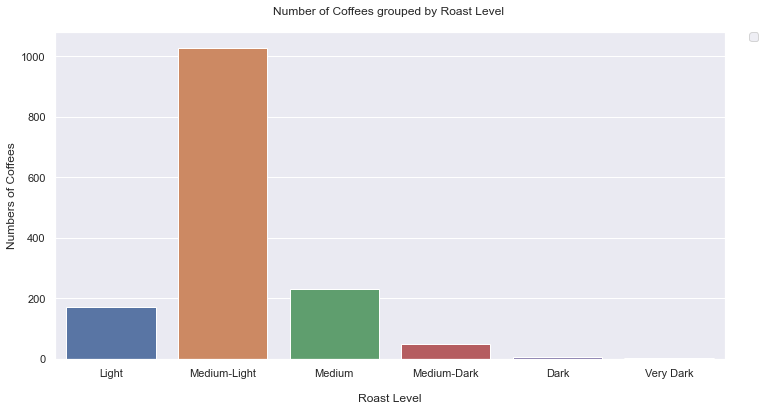

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Roast')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.xlabel("\nRoast Level")
plt.ylabel("Numbers of Coffees")
plt.title("Number of Coffees grouped by Roast Level \n")

#### The figure shows that the majority of coffee brands have a medium-light roast level with approximately 1000 brands with this roast level.
#### The medium roast level is around 200 brands, and below 200 brands the light, medium dark, dark, and very dark roast levels are located.

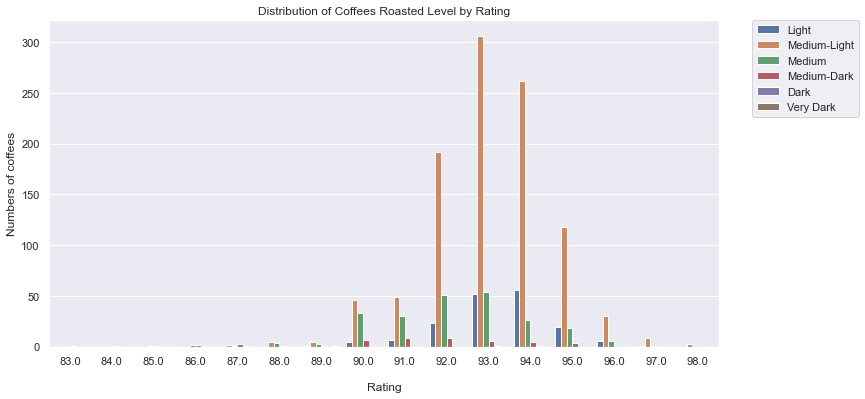

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x='Rating', hue='Roast', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.xlabel("\nRating")
plt.ylabel('Numbers of coffees')
plt.title('Distribution of Coffees Roasted Level by Rating')
plt.show()

#### The roast distribution figure shows that the largest number of coffee brands is between 92 and 96 rating points with different roast levels. The roast that predominates in all the scores is the medium-light roast level.